### Imporing libraries

In [157]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### reading img

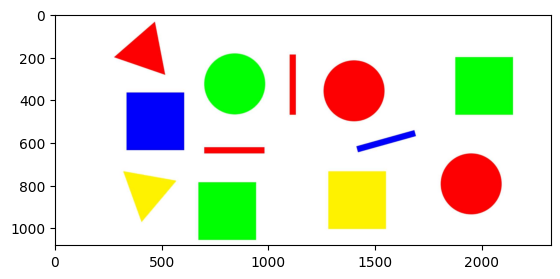

In [158]:
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### detecting edges

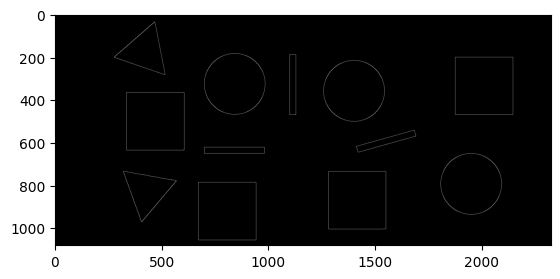

In [159]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 80, 150)
plt.imshow(edges, cmap="gray")

### Check the shape

(1080, 2324, 3)


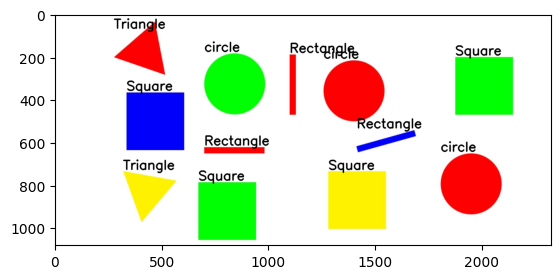

In [160]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
# returns a list of arrays of (x,y) coordanites of points along the edges of each contour

for shape in contours: #loops on all shapes one by one
    perimeter = cv2.arcLength(shape, True)
    corners = cv2.approxPolyDP(shape, 0.02 * perimeter , True) #return list of coordanetes of corners
    n_corners = len(corners)
    x, y, width, height = cv2.boundingRect(corners)

    if n_corners == 3:
        answer = "Triangle"
    elif n_corners == 4:
        if width/height < 1.1 and width/height > 0.9:
            answer = "Square"
        else : 
            answer = "Rectangle"
    else :
        answer = "circle"
    
    if (y-10) < 50:
        cv2.putText(img, answer, (x, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)
    else:
        cv2.putText(img, answer, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)

plt.imshow(img)
print(img.shape)


### setting colors

In [161]:
#red
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

#blue
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

#green
lower_green = np.array([40, 70, 70])
upper_green = np.array([80, 255, 255])

#yellow
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

### check the colors

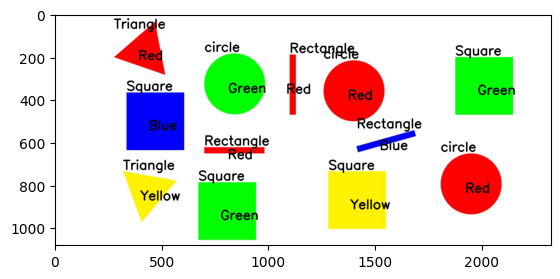

In [165]:
for shape in contours:
    perimeter = cv2.arcLength(shape, True)
    corners = cv2.approxPolyDP(shape, 0.02 * perimeter , True) #return list of coordanetes of corners
    n_corners = len(corners)

    #finding the center
    total_x = 0 
    total_y = 0
    for i in corners:
        x, y = i[0]
        total_x += x
        total_y += y

    center_y = int(total_y/n_corners)
    center_x = int(total_x/n_corners)

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    h , s , v = hsv[center_y, center_x]
    
    #red:
    if ((lower_red1[0] <= h <= upper_red1[0] and 
        lower_red1[1] <= s <= upper_red1[1] and 
        lower_red1[2] <= v <= upper_red1[2]) or
        (lower_red2[0] <= h <= upper_red2[0] and 
        lower_red2[1] <= s <= upper_red2[1] and 
        lower_red2[2] <= v <= upper_red2[2])):
        
        cv2.putText(img, "Red", (center_x-30, center_y+40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)

    #blue
    elif (lower_blue[0] <= h <= upper_blue[0] and 
        lower_blue[1] <= s <= upper_blue[1] and 
        lower_blue[2] <= v <= upper_blue[2]):

        cv2.putText(img, "Blue", (center_x-30, center_y+40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)

    #green
    elif (lower_green[0] <= h <= upper_green[0] and 
        lower_green[1] <= s <= upper_green[1] and 
        lower_green[2] <= v <= upper_green[2]):

        cv2.putText(img, "Green", (center_x-30, center_y+40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)

    #yellow
    elif (lower_yellow[0] <= h <= upper_yellow[0] and 
        lower_yellow[1] <= s <= upper_yellow[1] and 
        lower_yellow[2] <= v <= upper_yellow[2]):

        cv2.putText(img, "Yellow", (center_x-30, center_y+40), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)

plt.imshow(img)
